In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/var/folders/t7/jz8n1l4s0gsdprztprkfb_540000gn/T/ipykernel_8403/1168040318.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_all_data():
    with open("imbd_labelled.txt", "r") as text_file:
        data = text_file.read().split('\n')
         
    with open("amazon_labelled.txt", "r") as text_file:
        data += text_file.read().split('\n')

    with open("yelp_labelled.txt", "r") as text_file:
        data += text_file.read().split('\n')

    return data

all_data = get_all_data()

In [3]:
def preprocess(data):
    processing_data = []
    for single_data in data:
        if len(single_data.split("\t")) == 2 and single_data.split("\t")[1] != "":
            processing_data.append(single_data.split("\t"))

    return processing_data
pre = preprocess(all_data)
data = pd.DataFrame(pre, columns=['text', 'sentiment'])


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3000 non-null   object
 1   sentiment  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [18]:
data.to_csv('all_data.csv', index=False)

In [15]:
# Preprocess the data
X = data['text']  
y = data['sentiment']  

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=100)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Build the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10


/Users/joshuayao/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.5484 - loss: 0.6809 - val_accuracy: 0.7267 - val_loss: 0.5092
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.8185 - loss: 0.4361 - val_accuracy: 0.8067 - val_loss: 0.4512
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.9313 - loss: 0.1891 - val_accuracy: 0.7833 - val_loss: 0.5055
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.9805 - loss: 0.0783 - val_accuracy: 0.8100 - val_loss: 0.7079
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9873 - loss: 0.0433 - val_accuracy: 0.7867 - val_loss: 0.7503
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.9914 - loss: 0.0299 - val_accuracy: 0.7967 - val_loss: 0.6879
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.9953 - loss: 0.0164 - val_accuracy: 0.7950 - val_loss: 0.8754
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.9986 - loss: 0.0078 - val_accuracy: 0.7900 - val_

### Epoch Data Analysis

The epoch data provides insights into the performance of the model during training and validation over multiple epochs. Here are the key trends observed:

1. **Training Accuracy**:
   - The training accuracy shows a consistent and significant increase across epochs, starting from approximately 55% and reaching near-perfect accuracy close to 100% by the final epoch.

2. **Training Loss**:
   - The training loss decreases steadily, indicating that the model is learning effectively from the training data and minimizing errors.

3. **Validation Accuracy**:
   - The validation accuracy initially improves significantly, peaking early around 81%. However, it shows slight fluctuations and does not continue to improve consistently in later epochs.

4. **Validation Loss**:
   - The validation loss decreases initially but starts to increase in the later epochs, suggesting that the model might be overfitting to the training data. This is indicated by the validation loss surpassing the training loss after a few epochs.

### Key Observations

- **Overfitting**: The increasing gap between the high training accuracy and the fluctuating validation accuracy, along with the rising validation loss, indicates that the model may be overfitting to the training data. Overfitting occurs when the model learns the training data too well, including its noise and outliers, but fails to generalize to new, unseen data.

- **Early Stopping**: To prevent overfitting, techniques such as early stopping can be employed. This involves monitoring the validation loss during training and stopping the training process once the validation loss starts to increase.

- **Model Performance**: Despite the high training accuracy, the model's generalization to validation data is limited. Fine-tuning the model, using regularization techniques, or obtaining more training data might help improve its performance on the validation set.


In [19]:
import os

# Save the model to a file
model.save('model.h5')

# Find the current working directory
current_directory = os.getcwd()
model_path = os.path.join(current_directory, 'model.h5')
print(f"Model saved at: {model_path}")

Model saved at: /Users/joshuayao/Desktop/Sentiment Project/model.h5


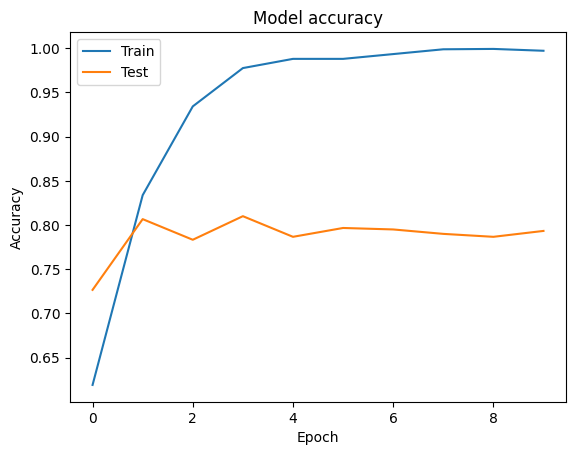

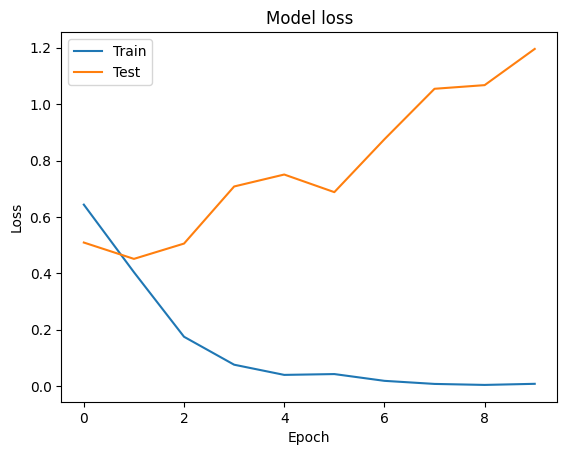

In [20]:
import matplotlib.pyplot as plt

# Visualize the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [22]:
def predict_sentiment(sentence):
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded_sequence)
    return prediction[0][0]

sentence = input("Please type a sentence to analyze: ")
sentiment_score = predict_sentiment(sentence)
print(f"Sentiment score: {sentiment_score:.10f}")

Please type a sentence to analyze:  that was awful


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Sentiment score: 0.00009386


In [56]:
data['text'][0]


'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '